In [20]:
import numpy as np
import itertools
from backend.simulation_tools import Simulator
from tasks import rdm
import matplotlib.pyplot as plt
import tensorly as tly
from tensorly.decomposition import parafac
%matplotlib inline

In [2]:
#model params
n_in = 1
n_hidden = 50 
n_out = 1
#n_steps = 80 
tau = 100.0 #As double
dt = 20.0  #As double
dale_ratio = 0
rec_noise = 0.0
stim_noise = 0.4
batch_size = 128
#var_delay_length = 50
cohs = [.01,.05,.1,.2,.4]
rt_version = False


params = rdm.set_params(n_in = n_in, n_out = n_out, n_steps = 200, coherences=cohs, 
                    stim_noise = stim_noise, rec_noise = rec_noise, L1_rec = 0, 
                    L2_firing_rate = 0, sample_size = 128, epochs = 100, N_rec = 50, 
                    dale_ratio=dale_ratio, tau=tau, dt = dt, task='n_back',rt_version=rt_version)


generator = rdm.generate_train_trials(params)


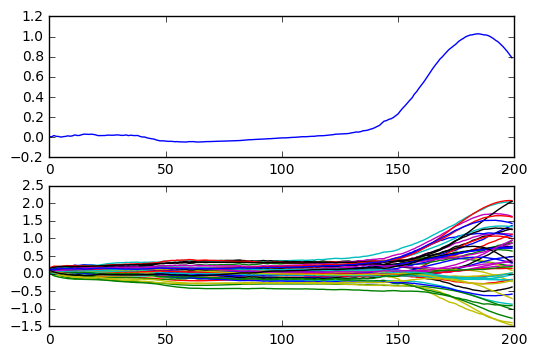

In [10]:
weights_path = './weights/rdm.npz'

weights = np.load(weights_path)

data = generator.next()

sim = Simulator(params, weights_path=weights_path)
output,states = sim.run_trial(data[0][0,:,:],t_connectivity=False)

plt.subplot(2,1,1)
plt.plot(output[:,0,:])
plt.subplot(2,1,2)
plt.plot(states[:,0,:])
plt.show()

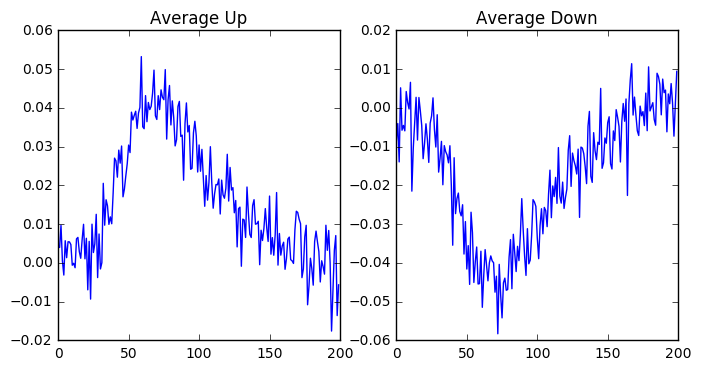

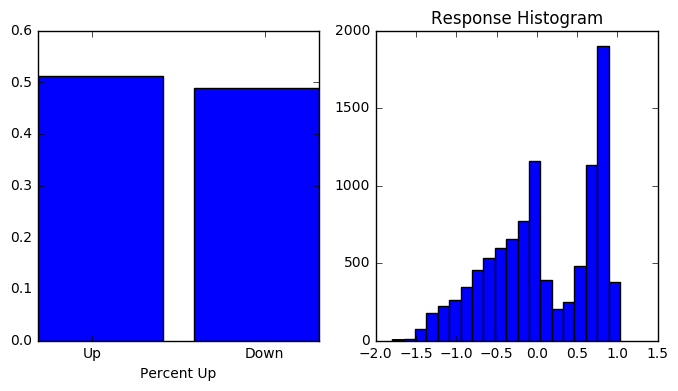

In [7]:
'''Analyze psychophysical kernels as well as choice bias'''

x_test,y_test,mask = rdm.build_test_trials(params)
mup,mdown,choice,resp = rdm.white_noise_test(sim,x_test)


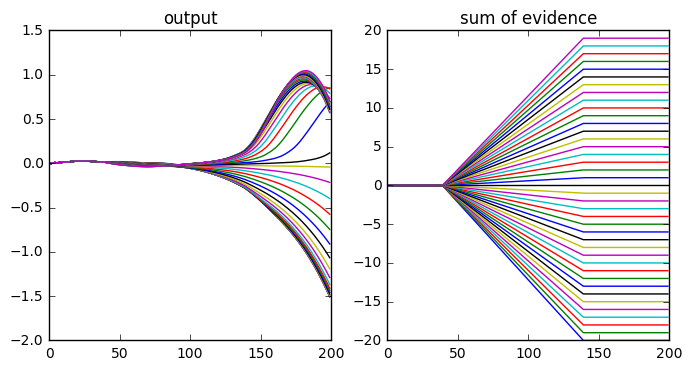

In [40]:
'''Trajectories in response to input of different coherences'''
cohs = np.arange(-.2,.2,.01)
coh_out = rdm.coherence_test(sim,cohs=cohs)

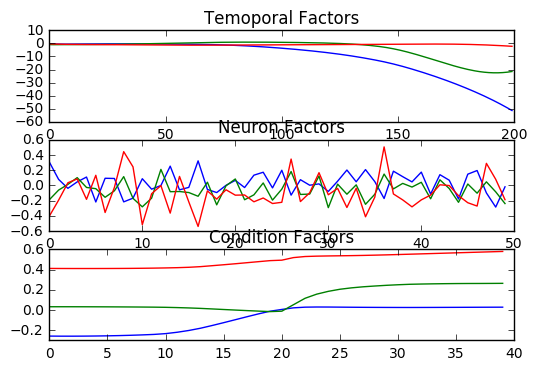

In [112]:
'''Tensor analysis of data matrix'''

data = coh_out[1]

tens_out = tly.tensor(data)
n_rank = 3
n_dims = 3
factors = parafac(tens_out,rank=n_rank)

f =  [None]*n_dims

for ii in range(n_dims):
    f[ii] = tly.to_numpy(factors[ii])

plt.subplot(3,1,1)
plt.plot(f[0])
plt.title('Temoporal Factors')
plt.subplot(3,1,2)
plt.plot(f[1])
plt.title('Neuron Factors')
plt.subplot(3,1,3)
plt.plot(f[2])
plt.title('Condition Factors')
plt.show()


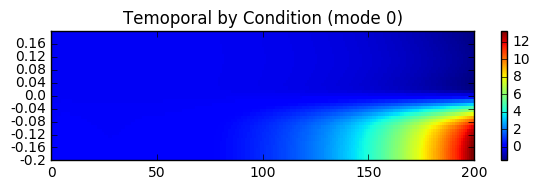

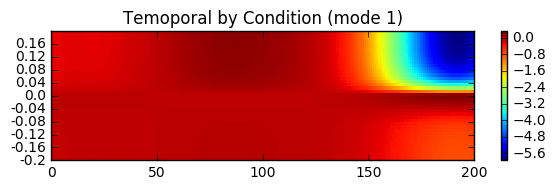

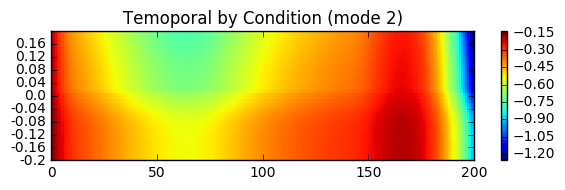

In [113]:
'''Time by Condition Plots'''


for ii in range(n_rank):
    plt.figure(figsize=(6,2))
    plt.pcolor(np.outer(f[0][:,ii],f[2][:,ii]).T)
    plt.title('Temoporal by Condition (mode %i)' % ii)
    plt.yticks(np.arange(0,40,4),np.round(cohs[np.arange(0,40,4)],decimals=2))
    plt.colorbar()
    plt.tight_layout()

# plt.subplot(3,1,2)
# plt.pcolor(np.outer(f[0][:,1],f[2][:,1]).T)
# plt.title('Temoporal by Condition (mode 2)')
# plt.yticks(np.arange(0,40,4),np.round(cohs[np.arange(0,40,4)],decimals=2))
# plt.ylabel('Coherence')
# plt.colorbar()

# plt.subplot(3,1,3)
# plt.pcolor(np.outer(f[0][:,2],f[2][:,2]).T)
# plt.title('Temoporal by Condition (mode 3)')
# plt.yticks(np.arange(0,40,4),np.round(cohs[np.arange(0,40,4)],decimals=2))
# plt.xlabel('Time')
# plt.colorbar()


plt.show()

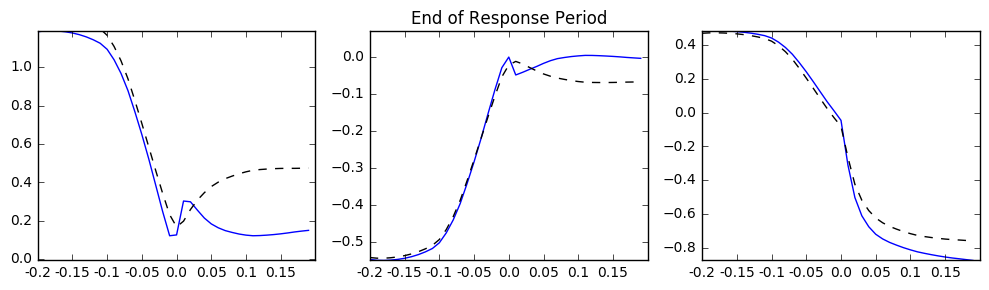

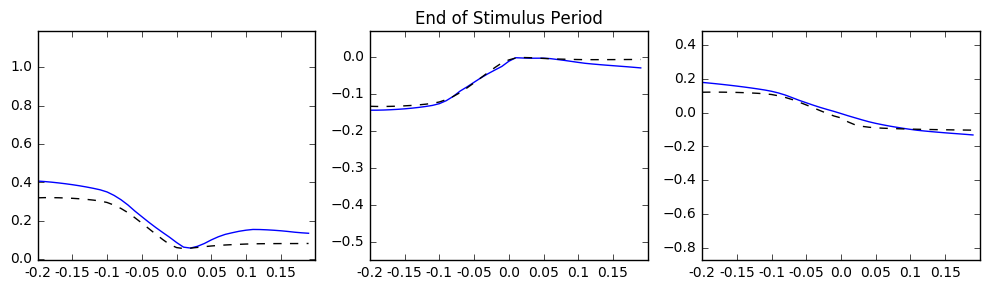

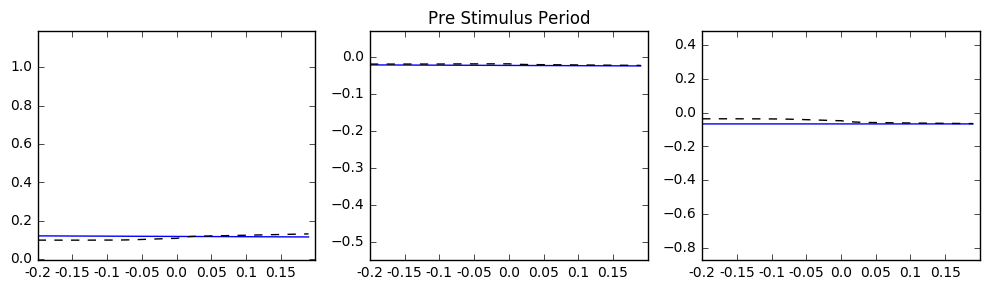

In [126]:
'''Reconstructions of tuning functions'''

low_rank_data = tly.to_numpy(tly.kruskal_to_tensor(factors))

plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.plot(np.squeeze(data[-1,1,:]))
plt.plot(np.squeeze(low_rank_data[-1,1,:]),'--k')
plt.xticks(np.arange(0,40,5),np.round(cohs[np.arange(0,40,5)],decimals=2))
plt.ylim([np.min(data[:,1,:]),np.max(data[:,1,:])] )

plt.subplot(1,3,2)
plt.title('End of Response Period')
plt.plot(np.squeeze(data[-1,2,:]))
plt.plot(np.squeeze(low_rank_data[-1,2,:]),'--k')
plt.xticks(np.arange(0,40,5),np.round(cohs[np.arange(0,40,5)],decimals=2))
plt.ylim([np.min(data[:,2,:]),np.max(data[:,2,:])] )

plt.subplot(1,3,3)
plt.plot(np.squeeze(data[-1,3,:]))
plt.plot(np.squeeze(low_rank_data[-1,3,:]),'--k')
plt.xticks(np.arange(0,40,5),np.round(cohs[np.arange(0,40,5)],decimals=2))
plt.ylim([np.min(data[:,3,:]),np.max(data[:,3,:])] )

plt.tight_layout()

plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.plot(np.squeeze(data[140,1,:]))
plt.plot(np.squeeze(low_rank_data[140,1,:]),'--k')
plt.xticks(np.arange(0,40,5),np.round(cohs[np.arange(0,40,5)],decimals=2))
plt.ylim([np.min(data[:,1,:]),np.max(data[:,1,:])] )

plt.subplot(1,3,2)
plt.title('End of Stimulus Period')
plt.plot(np.squeeze(data[140,2,:]))
plt.plot(np.squeeze(low_rank_data[140,2,:]),'--k')
plt.xticks(np.arange(0,40,5),np.round(cohs[np.arange(0,40,5)],decimals=2))
plt.ylim([np.min(data[:,2,:]),np.max(data[:,2,:])] )

plt.subplot(1,3,3)
plt.plot(np.squeeze(data[140,3,:]))
plt.plot(np.squeeze(low_rank_data[140,3,:]),'--k')
plt.xticks(np.arange(0,40,5),np.round(cohs[np.arange(0,40,5)],decimals=2))
plt.ylim([np.min(data[:,3,:]),np.max(data[:,3,:])] )

plt.tight_layout()

plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.plot(np.squeeze(data[40,1,:]))
plt.plot(np.squeeze(low_rank_data[40,1,:]),'--k')
plt.xticks(np.arange(0,40,5),np.round(cohs[np.arange(0,40,5)],decimals=2))
plt.ylim([np.min(data[:,1,:]),np.max(data[:,1,:])] )

plt.subplot(1,3,2)
plt.title('Pre Stimulus Period')
plt.plot(np.squeeze(data[40,2,:]))
plt.plot(np.squeeze(low_rank_data[40,2,:]),'--k')
plt.xticks(np.arange(0,40,5),np.round(cohs[np.arange(0,40,5)],decimals=2))
plt.ylim([np.min(data[:,2,:]),np.max(data[:,2,:])] )

plt.subplot(1,3,3)
plt.plot(np.squeeze(data[40,3,:]))
plt.plot(np.squeeze(low_rank_data[40,3,:]),'--k')
plt.xticks(np.arange(0,40,5),np.round(cohs[np.arange(0,40,5)],decimals=2))
plt.ylim([np.min(data[:,3,:]),np.max(data[:,3,:])] )

plt.tight_layout()
plt.show()

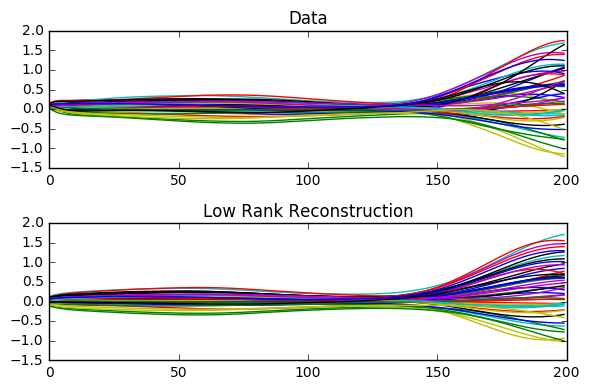

In [115]:
'''Reconstructed Trajectories'''
plt.subplot(2,1,1)
plt.plot(data[:,:,25])
plt.title('Data')
plt.subplot(2,1,2)
plt.plot(low_rank_data[:,:,25])
plt.title('Low Rank Reconstruction')

plt.tight_layout()
plt.show()

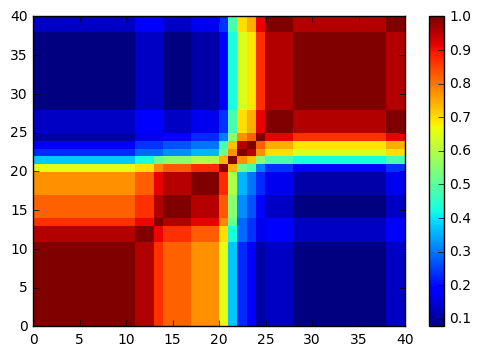

In [164]:
plt.pcolor(np.corrcoef(data[140,:,:].T > 0))
plt.colorbar()
plt.show()